In [1]:
import tensorflow as tf

import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
from lfp4uda.feature_extractor import FeatureExtractor
from lfp4uda.holistic_discriminator import HolisticDiscriminator
from lfp4uda.local_discriminator import LocalDiscriminator
from lfp4uda.local_feature_alignment import LocalFeatureAlignment
from lfp4uda.netvlad import NetVLAD
from lfp4uda.single_layer_classifier import SingleLayerClassifier
import os

%matplotlib inline

In [17]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMG_HEIGHT = 300
IMG_WIDTH = 300
STEPS_PER_EPOCH = np.ceil(2817/BATCH_SIZE)

In [3]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=100)

  return ds


In [4]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n])
      plt.axis('off')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach t

/usr/lib/python3.8/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
VGG16 running...
KMeans running...
<class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 8, 8, 512)


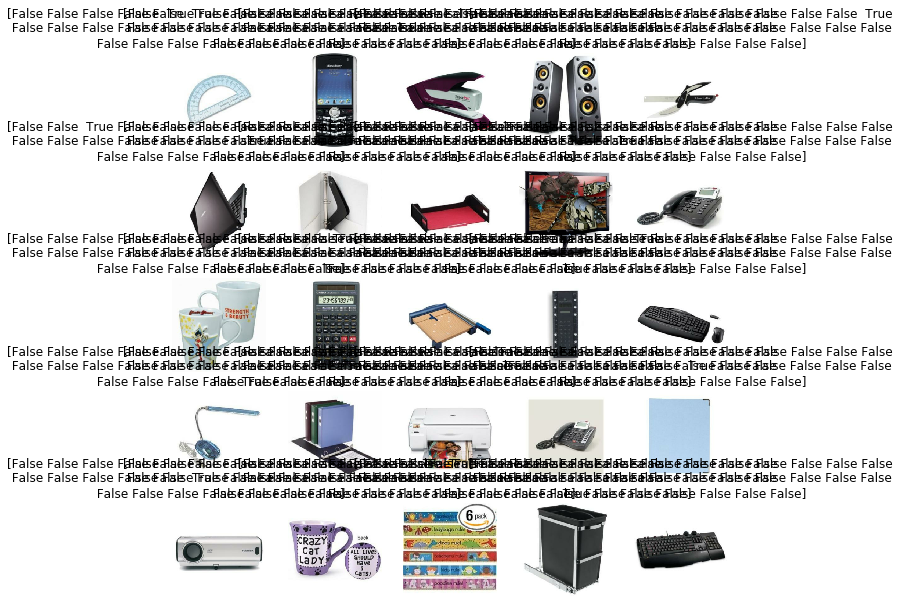

In [5]:
from lfp4uda.feature_extractor import FeatureExtractor
from lfp4uda.netvlad import NetVLAD
from lfp4uda.local_feature_alignment import LocalFeatureAlignment
from lfp4uda.holistic_discriminator import HolisticDiscriminator
from lfp4uda.local_discriminator import LocalDiscriminator
from lfp4uda.single_layer_classifier import SingleLayerClassifier
from lfp4uda.office_31_preprocessing import Office31
import tensorflow as tf
from tensorflow.python.data.ops.dataset_ops import MapDataset
import numpy as np
from sklearn.cluster import KMeans

class WenModel:

    def __init__(self, source: MapDataset, target: MapDataset):

        # Init

        feature_extractor = FeatureExtractor()
        input_0 = tf.keras.layers.Input(shape=(256, 256, 3))
        model_0 = tf.keras.models.Model(
            inputs=[input_0], outputs=feature_extractor(input_0))
        print("VGG16 running...")
        features = model_0(source)
        print("KMeans running...")
        print(type(features))
        print(features.shape)
        #kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=32)
        #kmeans.train(lambda: features)
        #centroids = kmeans.cluster_centers()
        print("Tvb")
        # netvlad = NetVLAD(0.01, centroids)
        # single_layer_classifier = SingleLayerCLassifer()

        # softmax = tf.keras.layers.Softmax()
        # holistic_discriminator = HolisticDiscriminator(768, 1536)

        # feature_alignment = LocalFeatureAlignment()
        # local_discriminator = LocalDiscriminator(2048, 4096)


if __name__ == "__main__":
    BATCH_SIZE = 32
    amazon_dataset = prepare_for_training(Office31().import_folder()[0])
    image_batch, label_batch = next(iter(amazon_dataset))

    show_batch(image_batch.numpy(), label_batch.numpy())

    source = image_batch
    feature_extractor = FeatureExtractor()
    input_0 = tf.keras.layers.Input(shape=(256, 256, 3))
    model_0 = tf.keras.models.Model(
                inputs=[input_0], outputs=feature_extractor(input_0))
    print("VGG16 running...")
    features = model_0(source)
    print("KMeans running...")
    print(type(features))
    print(features.shape)

In [6]:
features_np = tf.keras.backend.reshape(
    features,
    shape=(32*8*8,512)).numpy()

In [7]:
kmeans = KMeans(n_clusters=32)

In [8]:
kmeans.fit(features_np)
centroids = kmeans.cluster_centers_

In [9]:
print(centroids.shape)

(32, 512)


In [10]:
netvlad = NetVLAD(0.01, centroids)

In [11]:
single_layer_classifier = SingleLayerClassifier(31)

softmax = tf.keras.layers.Softmax()
holistic_discriminator = HolisticDiscriminator(768, 1536)

feature_alignment = LocalFeatureAlignment()
local_discriminator = LocalDiscriminator(2048, 4096)

In [12]:
from lfp4uda.netvlad import NetVLAD

image = tf.keras.layers.Input(shape=(256, 256, 3))
layer1 = feature_extractor(image)
layer2, _, _ = netvlad(layer1)
layer3 = single_layer_classifier(layer2)
layer4 = softmax(layer3)
model_step_1 = tf.keras.models.Model(inputs=[image], outputs=layer4)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid value for "node": expected "ast.AST", got "<class 'NoneType'>"; to visit lists of nodes, use "visit_block" instead
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid value for "node": expected "ast.AST", got "<class 'NoneType'>"; to visit lists of nodes, use "visit_block" 

In [13]:
print(model_step_1(source))

Hello similarities
(32, 8, 8, 32)
tf.Tensor(
[[0.03226882 0.03222282 0.0322796  0.03225587 0.03230876 0.03221335
  0.03228299 0.03233355 0.03215611 0.03223852 0.03229262 0.03232058
  0.03219502 0.0322588  0.03225427 0.03232683 0.03226046 0.032254
  0.0322757  0.03221786 0.0323506  0.0322033  0.03227528 0.03220675
  0.03236792 0.03213313 0.03226095 0.03231373 0.03215185 0.03224254
  0.03227742]
 [0.03222159 0.03217874 0.03234837 0.03229883 0.03237509 0.03226186
  0.03239949 0.03231513 0.03215984 0.03224228 0.03226531 0.03231462
  0.03214432 0.03219712 0.0321939  0.03224741 0.03233171 0.03214893
  0.03221899 0.0322268  0.03219997 0.03220444 0.03226905 0.03243915
  0.03227948 0.03228472 0.03229383 0.03227829 0.03221393 0.03223293
  0.03221392]
 [0.03233989 0.0322476  0.03217739 0.03221858 0.0324499  0.03216265
  0.03226633 0.03236333 0.03217424 0.03220228 0.03241527 0.03224982
  0.03215506 0.03227631 0.03233489 0.03233229 0.03231958 0.03226896
  0.03216803 0.03219914 0.03223898 0.03222164

In [15]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model_step_1.compile(loss='categorical_crossentropy',optimizer='adam')
model_step_1.fit(image_batch, label_batch)

Train on 32 samples
Hello similarities
(32, 8, 8, 32)
Hello similarities
(32, 8, 8, 32)
32/32 [==============================] - 41s 1s/sample - loss: 3.4342


In [ ]:
model_step_1.fit(amazon_dataset, steps_per_epoch=STEPS_PER_EPOCH)

Train for 89.0 steps
Hello similarities
(None, 8, 8, 32)
 2/89 [..............................] - ETA: 40:07 - loss: 3.4314